In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.discrete.discrete_model
import statsmodels.api as sma
import statsmodels.formula.api as smf

# STK9900 Mandatory assignment 2

## Viktor Ananiev

### Problem 1

In [2]:
crabs = pd.read_csv("data/crabs.txt", sep="\s+")
display(crabs.head())
display(crabs.describe())

,y,width,weight,color,spine
0,1,28.3,3.05,2,3
1,0,22.5,1.55,3,3
2,1,26.0,2.30,1,1
3,0,24.8,2.10,3,3
4,1,26.0,2.60,3,3


,y,width,weight,color,spine
count,173.000000,173.000000,173.000000,173.000000,173.000000
mean,0.641618,26.298844,2.437191,2.439306,2.485549
std,0.480917,2.109061,0.577025,0.801933,0.825516
min,0.000000,21.000000,1.200000,1.000000,1.000000
25%,0.000000,24.900000,2.000000,2.000000,2.000000
50%,1.000000,26.100000,2.350000,2.000000,3.000000
75%,1.000000,27.700000,2.850000,3.000000,3.000000
max,1.000000,33.500000,5.200000,4.000000,3.000000


**a)** Since we are interested in the *probability* of presence of the satellites, a suitable model could be *logistic regression*. Its prediction is a quantity between 0 and 1 which suits very well for probability estimations. Moreover, it works the best when the outcome is binary because it saturates quickly with amount of confidence.

In [3]:
crabs_model_width = sma.Logit(crabs["y"], crabs[["width"]].assign(intercept=1)).fit()

Optimization terminated successfully.
         Current function value: 0.562002
         Iterations 6


In [4]:
crabs_model_width.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  173
Model:                          Logit   Df Residuals:                      171
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Apr 2020   Pseudo R-squ.:                  0.1387
Time:                        10:19:33   Log-Likelihood:                -97.226
converged:                       True   LL-Null:                       -112.88
Covariance Type:            nonrobust   LLR p-value:                 2.204e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
width          0.4972      0.102      4.887      0.000       0.298       0.697
intercept    -12.3508      2.629     -4.698      0.000     -17.503      -7.199
==============================================================================
"""

**b)** Odds: $\frac{p}{1-p}$ in case of the logistic regression is $\mathrm{e}^{\sum_i a_i x_i}$ (assuming $x_0 = 1$)

Consequently, odds ratio is a ratio of exponents above. In case of unit increase of $x_i$, odds ratio is just $e^{a_i}$

In [5]:
np.exp(crabs_model_width.params[["width"]])

width    1.644162
dtype: float64

Odds ratio in our case is not the best approximation for the relative risk because the approximation works well when we can neglect odds in comparison to $1$ in the odds ration expression (then odds ratio looks like risk ratio). We operate on the data with crab widths ~ $24~cm$, while width coefficient is close to $0.5$ and intercept is close to $-12$. Regarding these numbers, we estimate the value of odds ($e^{~0} \approx 1$) as close to $1$. It is unacceptable to neglect it in the expression for $p$: $p = \frac{e^{\beta_i x_i}}{1 - e^{\beta_i x_i}}$

We can find confidence interval for odds ratio by substituting upper and lower CI boundary for the width coefficient value: $[e^{a_{lower}}, e^{a_{upper}}]$

In [6]:
# 95% confidence interval for width odds
np.exp(crabs_model_width.conf_int(0.05).loc[["width"]].rename(columns={0: "lower OR", 1: "upper OR"}))

,lower OR,upper OR
width,1.346935,2.006977


Odds ratio 95% confidence interval does not wrap $1$, it means that effect of width is significant in the model.

**c)**

Logistic regression model for weight exclusively

In [7]:
sma.Logit(crabs["y"], crabs[["weight"]].assign(intercept=1)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.565714
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  173
Model:                          Logit   Df Residuals:                      171
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Apr 2020   Pseudo R-squ.:                  0.1330
Time:                        10:19:33   Log-Likelihood:                -97.869
converged:                       True   LL-Null:                       -112.88
Covariance Type:            nonrobust   LLR p-value:                 4.273e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
weight         1.8151      0.377      4.819      0.000       1.077       2.553
intercept     -3.6947      0.880     -4.198      0.000      -5.420      -1.970
==============================================================================
"""

Logistic regression for `color` exclusively

In [8]:
smf.logit("y~color", data=crabs).fit().summary()

Optimization terminated successfully.
         Current function value: 0.616468
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  173
Model:                          Logit   Df Residuals:                      171
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Apr 2020   Pseudo R-squ.:                 0.05519
Time:                        10:19:33   Log-Likelihood:                -106.65
converged:                       True   LL-Null:                       -112.88
Covariance Type:            nonrobust   LLR p-value:                 0.0004156
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3635      0.555      4.257      0.000       1.275       3.452
color         -0.7147      0.209     -3.412      0.001      -1.125      -0.304
==============================================================================
"""

We also tried to fit `color` as a categorical variable, but when it showed monotoneous pattern depending on the level of darkness, we decided to switch to continuous variable letting the logistic regression to approximate between given discrete values. Such approach gave higher significance and reduced number of degrees of freedom. The result can be confirmed by the deviance test between categorical and numerical models

Logistic regression for `spine` exclusively

In [9]:
smf.logit("y~C(spine)", data=crabs).fit().summary()

Optimization terminated successfully.
         Current function value: 0.645180
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  173
Model:                          Logit   Df Residuals:                      170
Method:                           MLE   Df Model:                            2
Date:                Tue, 07 Apr 2020   Pseudo R-squ.:                 0.01119
Time:                        10:19:33   Log-Likelihood:                -111.62
converged:                       True   LL-Null:                       -112.88
Covariance Type:            nonrobust   LLR p-value:                    0.2828
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8602      0.360      2.392      0.017       0.155       1.565
C(spine)[T.2]    -0.9937      0.630     -1.577      0.115      -2.229       0.242
C(spine)[T.3]    -0.2647      0.407     -0.651      0.515      -1.062       0.533
=================================================================================
"""

Neither of approches for using `spine` as a predictor variable show significant results, so we suggest to not include it into the general model.

**d)** Let's fit logistic regression for all given variables together

In [10]:
smf.logit("y~width+weight+C(spine)+color", data=crabs).fit().summary()

Optimization terminated successfully.
         Current function value: 0.538823
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  173
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            5
Date:                Tue, 07 Apr 2020   Pseudo R-squ.:                  0.1742
Time:                        10:19:33   Log-Likelihood:                -93.216
converged:                       True   LL-Null:                       -112.88
Covariance Type:            nonrobust   LLR p-value:                 2.042e-07
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -6.8295      3.885     -1.758      0.079     -14.444       0.785
C(spine)[T.2]    -0.0448      0.705     -0.064      0.949      -1.427       1.337
C(spine)[T.3]     0.5033      0.491      1.026      0.305      -0.458       1.465
width             0.2552      0.193      1.320      0.187      -0.124       0.634
weight            0.8208      0.696      1.180      0.238      -0.543       2.184
color            -0.6040      0.243     -2.483      0.013      -1.081      -0.127
=================================================================================
"""

Such a generic model shows much less significant effects. The reason for this might be hidden in the explicit correlation between `width` and `weight`. Also we included insignificant spine predictor which introduces noise into the model. Let's get rid of both of them and see what happens

In [11]:
smf.logit("y~width+color", data=crabs).fit().summary()

Optimization terminated successfully.
         Current function value: 0.546593
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  173
Model:                          Logit   Df Residuals:                      170
Method:                           MLE   Df Model:                            2
Date:                Tue, 07 Apr 2020   Pseudo R-squ.:                  0.1623
Time:                        10:19:33   Log-Likelihood:                -94.561
converged:                       True   LL-Null:                       -112.88
Covariance Type:            nonrobust   LLR p-value:                 1.107e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.0708      2.807     -3.588      0.000     -15.572      -4.569
width          0.4583      0.104      4.406      0.000       0.254       0.662
color         -0.5090      0.224     -2.276      0.023      -0.947      -0.071
==============================================================================
"""

It turns out that significant of `width` and `color` has increased when we removed noise from the model. Moreover we made it more robust by reducing number of degrees of freedom. Currently, both effects are significant within $95\%$ confidence limit.

**d)** Finally, let's test our model for interactions. For this we will use the rough approximation that if interactions were included, log-likelihood will become $0$, meaning our model becomes perfect. Then we test null hypothesis that coefficients for interaction terms are all equal to zero. Then deviance test will give a statistic which will be distributed as a $\chi^2$ with number of degrees of freedom comparable to number of data points (because we expect that if null-hypothesis is true, interaction terms will introduce $~n$ noisy contributions) 

In [12]:
# p-value for deviance test for interactions
1 - sp.stats.chi2(170).cdf(2*(0 - (-94)))

0.16364845796092442

Here we used the value for test statistics based on the log-likelihood of the reduced model (`width` and `color`), but the log-likelihood does not differ dramatically from other models fitted. The general conclusion is that we don't have enough evidence to exclude null hypothesis (the model without interactions), in other words we don't have significant arguments for including interactions to the model.

### Problem 2

In [13]:
olympics = pd.read_csv("data/olympic.txt", sep="\t", index_col="Country")
olympics.columns = [c.replace(".", "_") for c in olympics.columns]
display(olympics.head())
display(olympics.describe())

,Total2000,Total1996,Log_population,Log_athletes,GDP_per_cap
Country,,,,,
United States,97,101,12.520986,6.498282,27.614331
Russia,88,63,11.901136,6.148468,2.414843
China,59,50,14.043202,5.686975,0.721574
Australia,58,41,9.826607,6.484635,19.859719
Germany,57,65,11.316095,6.208590,28.790279


,Total2000,Total1996,Log_population,Log_athletes,GDP_per_cap
count,66.000000,66.000000,66.000000,66.000000,66.000000
mean,13.833333,12.530303,9.801930,4.619316,11.206068
std,19.433978,17.981375,1.536087,0.987486,12.600124
min,1.000000,1.000000,5.690359,1.609438,0.077966
25%,3.000000,2.000000,8.616626,4.020611,1.384283
50%,6.000000,6.000000,9.680050,4.642724,3.688832
75%,14.000000,15.000000,10.927157,5.321787,19.874777
max,97.000000,101.000000,14.043202,6.498282,44.737688


**a)** As a candidate model for describing the olympic data we choose Poisson model. The reason for this, is that number of medals can be earned throughout the time of olympic championship with some rate $\lambda$. The latter depends especially on the country and its properties, and is independent of individuals of the same country. Since in the data we are provided with total number of medals per country, in order to normalize rate per athlet (obviously, the more athletes country has the more medals they potentially can win in total) we can introduce the offset into our model: $\lambda = N_{athletes} \cdot \lambda_{athlet}$. Where $\lambda_{athlet}$ can be modelled as a Poisson variable: $\lambda = \mathrm{e}^{\log{N_{athletes}} + \sum_i \beta_i x_i}$ (we assume $x_0 = 1$)

In [14]:
olymp_model = sma.GLM.from_formula("Total2000~GDP_per_cap", data=olympics, family=sma.families.Poisson(), offset=olympics["Log_athletes"]).fit()
olymp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Total2000   No. Observations:                   66
Model:                            GLM   Df Residuals:                       64
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -251.56
Date:                Tue, 07 Apr 2020   Deviance:                       250.44
Time:                        10:19:33   Pearson chi2:                     243.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.3363      0.052    -45.111      0.000      -2.438      -2.235
GDP_per_cap    -0.0053      0.003     -1.909      0.056      -0.011       0.000
===============================================================================
"""

**b)** The reason behind including the `population` is that among larger number of people in the country it is easier to find those suitable for olympics.  After testing the significance of the `population` variable we decided to exclude it regarding it not showing any reasonable effect. So, probably it is not only statistical factor that counts when looking for the great athletes. Maybe the correlation will be more explicit for the countries with more totalitarian regimen (then country can actually pick bright athletes forcefully). Since we have mixed data here, let's exclude `population`.

Then, since we normalize on the number of athletes, we do not include this variable (`Log.athletes`) as a predictor.

`Total1996` is excluded as well, since it might be a good predictor for 2000's results, but it also might include GDP effects inside of it. Better GDP → more investments in sport, better facilities for training, more work places, etc. So we are not 100% sure this variable is orthogonal to `GDP.per.cap`, thus we exclude it to test GDP significance.

We, of course, include `GDP.per.cap` because we are interested in it's significance.

**Result**

As a result, we are at the edge of rejecting null hypothesis (H0 states that GDP does not affect number of medals) at 95% level. But still we don't have strong evidence towards it.

**b.2)** To make the story complete, we also present the model that gives better description of the provided data. Now we don't exlcude `Total1996` because it is very helpful for characterizing country's involvement into sports. 

In [15]:
olymp_model_full_int = sma.GLM.from_formula("Total2000~GDP_per_cap+Total1996+GDP_per_cap:Total1996", data=olympics, family=sma.families.Poisson(), offset=olympics["Log_athletes"]).fit()
olymp_model_full_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Total2000   No. Observations:                   66
Model:                            GLM   Df Residuals:                       62
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -185.05
Date:                Tue, 07 Apr 2020   Deviance:                       117.43
Time:                        10:19:33   Pearson chi2:                     124.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.8027      0.082    -34.057      0.000      -2.964      -2.641
GDP_per_cap              -0.0034      0.004     -0.792      0.428      -0.012       0.005
Total1996                 0.0205      0.002      9.123      0.000       0.016       0.025
GDP_per_cap:Total1996    -0.0004   9.63e-05     -3.906      0.000      -0.001      -0.000
=========================================================================================
"""

We also train a model without interaction in order to test for significance of the interaction using deviance f test.

In [16]:
olymp_model_full = sma.GLM.from_formula("Total2000~GDP_per_cap+Total1996", data=olympics, family=sma.families.Poisson(), offset=olympics["Log_athletes"]).fit()
olymp_model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Total2000   No. Observations:                   66
Model:                            GLM   Df Residuals:                       63
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -192.53
Date:                Tue, 07 Apr 2020   Deviance:                       132.39
Time:                        10:19:33   Pearson chi2:                     132.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.5893      0.058    -44.916      0.000      -2.702      -2.476
GDP_per_cap    -0.0158      0.003     -5.164      0.000      -0.022      -0.010
Total1996       0.0128      0.001     11.247      0.000       0.011       0.015
===============================================================================
"""

In [17]:
# anova for glm in python statsmodels: https://stackoverflow.com/a/60769343

from scipy import stats

def calculate_nested_f_statistic(small_model, big_model):
    """Given two fitted GLMs, the larger of which contains the parameter space of the smaller, return the F Stat and P value corresponding to the larger model adding explanatory power"""
    addtl_params = big_model.df_model - small_model.df_model
    f_stat = (small_model.deviance - big_model.deviance) / (addtl_params * big_model.scale)
    df_numerator = addtl_params
    # use fitted values to obtain n_obs from model object:
    df_denom = (big_model.fittedvalues.shape[0] - big_model.df_model)
    p_value = stats.f.sf(f_stat, df_numerator, df_denom)
    return (f_stat, p_value)

In [18]:
olymp_full_f_stat, olymp_full_p_value = calculate_nested_f_statistic(olymp_model_full, olymp_model_full_int)
olymp_full_int_summary = pd.DataFrame({"f_stat": [olymp_full_f_stat], "p_value": [olymp_full_p_value]})
display(olymp_full_int_summary)

,f_stat,p_value
0,14.957838,0.000263


Having conducted the test, we claim that interactions are significant in the model, and we have to include them. This will help to make implicit dependency of `Total1996` on `GDP` to become explicit.

### Problem 3

In [19]:
cyr_data = pd.read_csv("data/cirrhosis.txt", sep="\t")
display(cyr_data.head())
display(cyr_data.describe())

,status,time,treat,sex,asc,age,agegr
0,1,4,0,1,2,66,3
1,1,5,0,0,2,66,3
2,1,13,1,1,2,57,2
3,1,16,1,0,2,67,3
4,1,21,1,1,2,62,2


,status,time,treat,sex,asc,age,agegr
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,0.598361,1330.543033,0.485656,0.594262,0.307377,59.409836,2.159836
std,0.490733,1194.470413,0.500307,0.491538,0.640671,9.932837,0.680519
min,0.000000,4.000000,0.000000,0.000000,0.000000,17.000000,1.000000
25%,0.000000,230.750000,0.000000,0.000000,0.000000,53.000000,2.000000
50%,1.000000,955.500000,0.000000,1.000000,0.000000,60.000000,2.000000
75%,1.000000,2277.750000,1.000000,1.000000,0.000000,66.000000,3.000000
max,1.000000,4892.000000,1.000000,1.000000,2.000000,80.000000,3.000000


In [20]:
def plot_km_surv_factor(ax, data, column):
    uniques = sorted(data[column].value_counts().index.values)
    labels = []
    for val in uniques:
        mask = (data[column] == val)
        # https://www.statsmodels.org/stable/generated/statsmodels.duration.survfunc.SurvfuncRight.html
        # If `exog` is None, the standard Kaplan-Meier estimator is used.
        sm.duration.survfunc.SurvfuncRight(data[mask].time, data[mask].status).plot(ax);
        labels.extend([f"{column}={val}", None])
    ax.legend(*zip(*(pair for pair in zip(ax.get_lines(), labels) if pair[1] is not None)))

Kaplan Meier estimate and logrank test for `treat` covariate.

chi2: 0.7277855502502244, p: 0.3936019208963941


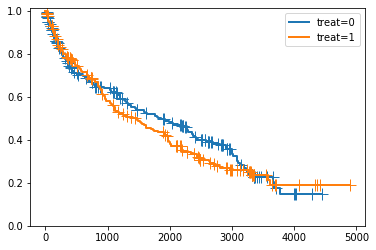

In [21]:
fig, ax = plt.subplots()
plot_km_surv_factor(ax, cyr_data, "treat")
chi2, p = sma.duration.survdiff(cyr_data.time, cyr_data.status, cyr_data.treat)
print(f"chi2: {chi2}, p: {p}")

From the plot it looks like **treatment** helps a bit, meaning treated patients decreased the probability of death. But logrank test tells us that the difference is not significant, so it is not enough evidence for us to reject null-hypothesis (that treated and untreated effects are the same). This happens because deviation between treated and untreated KM estimates deviate mostly within error bands.

Kaplan Meier estimate and logrank test for `sex` covariate

chi2: 3.549117671923825, p: 0.059577122208565925


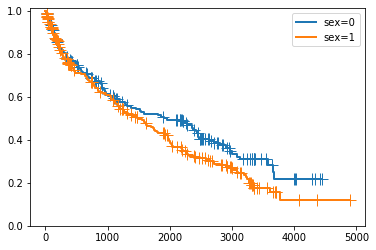

In [22]:
fig, ax = plt.subplots()
plot_km_surv_factor(ax, cyr_data, "sex")
chi2, p = sma.duration.survdiff(cyr_data.time, cyr_data.status, cyr_data.sex)
print(f"chi2: {chi2}, p: {p}")

In case of the **sex**, both lines also look similar (as for the treatment), but p-value is much lower, almost at the edge of 95% confidence. It is a hint to not throw away this covariate entirely, it might get more significant with more data.

Kaplan Meier estimate and logrank test for `agegr` covariate

chi2: 50.56287045985019, p: 1.0481282508578715e-11


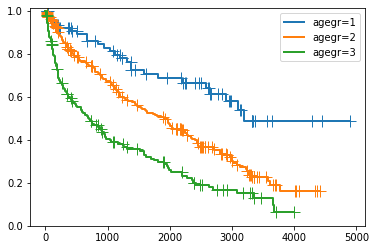

In [23]:
fig, ax = plt.subplots()
plot_km_surv_factor(ax, cyr_data, "agegr")
chi2, p = sma.duration.survdiff(cyr_data.time, cyr_data.status, cyr_data.agegr)
print(f"chi2: {chi2}, p: {p}")

Here we can see explicitly that **age group** matters. And very small p-value confirms that age group is an important feature to take into account. The older is person, the higher chance to die. There is a modification of the logrank test which accounts for ordered covariates by assigning weights to statistic depending on the group (standard test is omnibus regarding order).

https://web.stanford.edu/~lutian/coursepdf/unit6.pdf p12

Kaplan Meier estimate and logrank test for `asc` covariate

chi2: 69.92501454288704, p: 6.661338147750939e-16


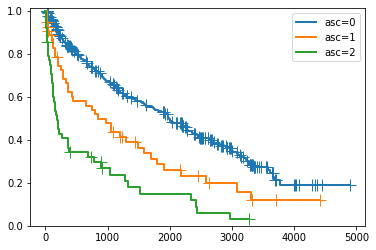

In [24]:
fig, ax = plt.subplots()
plot_km_surv_factor(ax, cyr_data, "asc")
chi2, p = sma.duration.survdiff(cyr_data.time, cyr_data.status, cyr_data.asc)
print(f"chi2: {chi2}, p: {p}")

Finally, **ascities** are also very important signatures of high hazard rate. We can see it from the plots, and p-value confirms it. The more liquid is in the abdomen the higher is the risk. Here also weighted test could be useful, to account for degree of ascities severity.

**b)** Work on this piece of assignment ended up in the contribution to python statsmodels package. Before, it supported survdiff for only two groups, now it allows any number of groups: https://github.com/statsmodels/statsmodels/pull/6626

*References:*

Calculations based on: https://web.stanford.edu/~lutian/coursepdf/unit6.pdf

But variance taken from: https://web.stanford.edu/~lutian/coursepdf/survweek3.pdf

**c)**

In [25]:
cyr_phreg = sm.duration.hazard_regression.PHReg(cyr_data.time, cyr_data[["treat", "sex", "age", "asc"]], cyr_data.status).fit()
cyr_phreg.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: PHReg
=========================================================
Model:                   PH Reg      Sample size:     488
Dependent variable:      time        Num. events:     292
Ties:                    Breslow                         
---------------------------------------------------------
      log HR log HR SE   HR     t    P>|t|  [0.025 0.975]
---------------------------------------------------------
treat 0.0449    0.1176 1.0459 0.3816 0.7027 0.8306 1.3170
sex   0.4618    0.1254 1.5870 3.6831 0.0002 1.2412 2.0291
age   0.0488    0.0068 1.0500 7.1493 0.0000 1.0361 1.0642
asc   0.5945    0.0829 1.8120 7.1734 0.0000 1.5404 2.1316
=========================================================
Confidence intervals are for the hazard ratios
"""

From the summary it follows that sex, age and ascities are much more responsible for survival rate (even within 99% confidence limit) than treatment. All the coefficients are positive, it means that their increase increases HR, as a result people with smaller value of the covariate have higher chances to survive.

Also, results of Cox regression tests reproduce our predictions from Kaplan Meier plots. Moreover as we expected, `sex` covariate gained significance from collective analysis.

Treatment doesn't show significant effect on the hazard rate (p-value is too big)

95% confidence limit for HR for `sex` covariate:

In [26]:
np.exp(cyr_phreg.conf_int(.05))[1]

array([1.24117948, 2.02908311])